In [159]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [160]:
df = pd.read_json('dataset.json',orient='records',lines=True)
df

,brand,model,year,fuel,transmition,driver,volume,power,distance,price
0,Mazda,Mazda6,2007,бензин,механика,передний,1.8,120.0,315000.0,850000
1,Infiniti,Q30,2018,бензин,робот,передний,2.0,211.0,54700.0,2750000
2,Toyota,Camry,2020,бензин,АКПП,передний,2.5,181.0,104000.0,3300000
3,Subaru,Justy,2018,бензин,вариатор,передний,1.0,69.0,70000.0,1219999
4,Mitsubishi,Outlander,2019,бензин,АКПП,4WD,3.0,227.0,84579.0,2918000
...,...,...,...,...,...,...,...,...,...,...
1995,Toyota,Harrier,2019,бензин,вариатор,передний,2.0,151.0,76000.0,3050000
1996,Isuzu,D-MAX,2024,дизель,механикановый,None,3.0,NaN,NaN,3750000
1997,Toyota,Gaia,2000,бензин,АКПП,4WD,2.0,135.0,307000.0,730000
1998,Toyota,Corolla,1993,бензин,автомат,передний,1.5,100.0,230000.0,350000


Информация о колонках \\
brand - бренд продоваемой машины \\
model - модель машины \\
year - год выпуска автомобиля \\
fuel - тип используемого топлива \\
transmition - тип коробки передач \\
driver - привод машины \\
volume - объем двигателя (л.) \\
power - мощность двигателя (л.с.) \\
distance - пробег машины (км) \\
price - цена (руб)

# Анализ и подготовка данных

In [161]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   brand        2000 non-null   object 
 1   model        2000 non-null   object 
 2   year         2000 non-null   int64  
 3   fuel         1999 non-null   object 
 4   transmition  1998 non-null   object 
 5   driver       1996 non-null   object 
 6   volume       1997 non-null   float64
 7   power        1992 non-null   float64
 8   distance     1921 non-null   float64
 9   price        2000 non-null   int64  
dtypes: float64(3), int64(2), object(5)
memory usage: 156.4+ KB


In [162]:
df = df.dropna()

In [163]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1918 entries, 0 to 1999
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   brand        1918 non-null   object 
 1   model        1918 non-null   object 
 2   year         1918 non-null   int64  
 3   fuel         1918 non-null   object 
 4   transmition  1918 non-null   object 
 5   driver       1918 non-null   object 
 6   volume       1918 non-null   float64
 7   power        1918 non-null   float64
 8   distance     1918 non-null   float64
 9   price        1918 non-null   int64  
dtypes: float64(3), int64(2), object(5)
memory usage: 164.8+ KB


Поскольку модель зависит от бренда, представляется сложным анализировать эту колонку

In [164]:
df = df.drop('model',axis=1)
df

,brand,year,fuel,transmition,driver,volume,power,distance,price
0,Mazda,2007,бензин,механика,передний,1.8,120.0,315000.0,850000
1,Infiniti,2018,бензин,робот,передний,2.0,211.0,54700.0,2750000
2,Toyota,2020,бензин,АКПП,передний,2.5,181.0,104000.0,3300000
3,Subaru,2018,бензин,вариатор,передний,1.0,69.0,70000.0,1219999
4,Mitsubishi,2019,бензин,АКПП,4WD,3.0,227.0,84579.0,2918000
...,...,...,...,...,...,...,...,...,...
1994,Honda,2007,бензин,АКПП,передний,1.8,140.0,176080.0,900000
1995,Toyota,2019,бензин,вариатор,передний,2.0,151.0,76000.0,3050000
1997,Toyota,2000,бензин,АКПП,4WD,2.0,135.0,307000.0,730000
1998,Toyota,1993,бензин,автомат,передний,1.5,100.0,230000.0,350000


## Анализ численных колонок

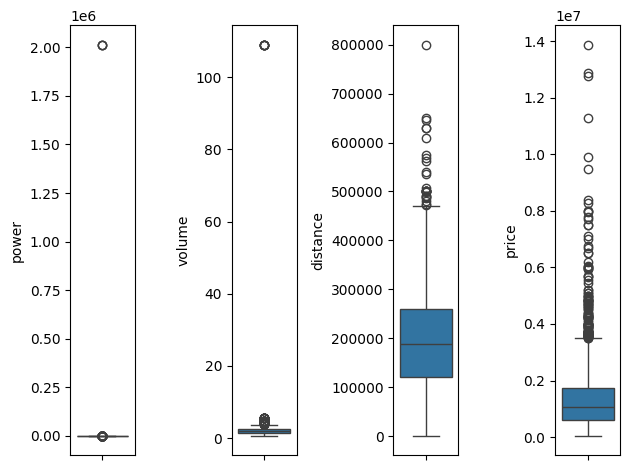

In [165]:
fig,ax = plt.subplots(ncols=4)
sns.boxplot(df,y='power',ax=ax[0])
sns.boxplot(df,y='volume',ax=ax[1])
sns.boxplot(df,y='distance',ax=ax[2])
sns.boxplot(df,y='price',ax=ax[3])
fig.tight_layout()
plt.show()

Видны явные выбросы в колонках power и volume, который нужно очистить.

In [166]:
cleaned_df= df[(df.power<1000000)&(df.volume<50)]

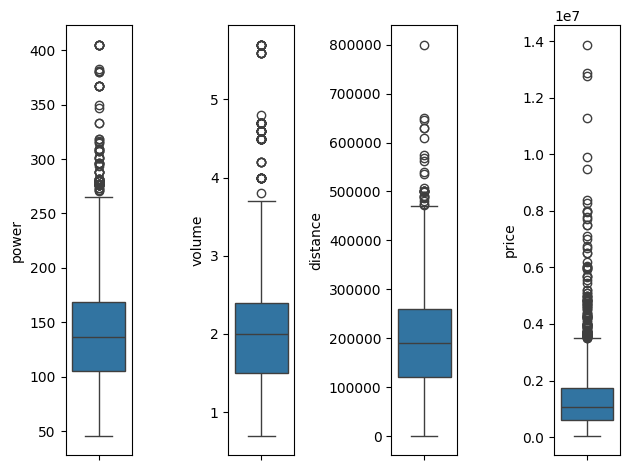

In [167]:
fig,ax = plt.subplots(ncols=4)
sns.boxplot(cleaned_df,y='power',ax=ax[0])
sns.boxplot(cleaned_df,y='volume',ax=ax[1])
sns.boxplot(cleaned_df,y='distance',ax=ax[2])
sns.boxplot(cleaned_df,y='price',ax=ax[3])
fig.tight_layout()
plt.show()

In [168]:
cleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1912 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   brand        1912 non-null   object 
 1   year         1912 non-null   int64  
 2   fuel         1912 non-null   object 
 3   transmition  1912 non-null   object 
 4   driver       1912 non-null   object 
 5   volume       1912 non-null   float64
 6   power        1912 non-null   float64
 7   distance     1912 non-null   float64
 8   price        1912 non-null   int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 149.4+ KB


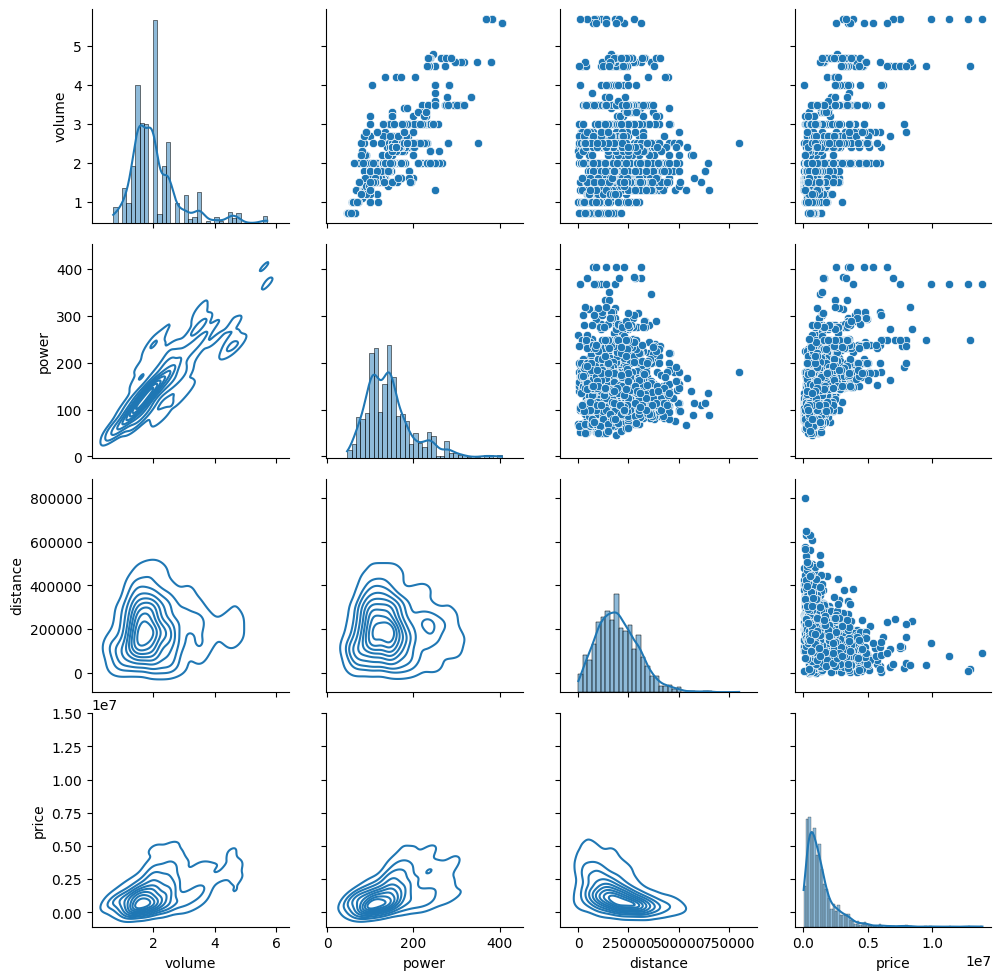

In [169]:
g = sns.PairGrid(cleaned_df[['volume','power','distance','price']])
g.map_diag(sns.histplot,kde=True)
g.map_upper(sns.scatterplot)
g.map_lower(sns.kdeplot)
plt.show()

Из графиков выше видно, что сильная взаимосвязб есть между power и volume. Так же можно сформировать гипотезы, что данные в колонках имеют логнормальное распределение.



## Анализ категориальных колонок

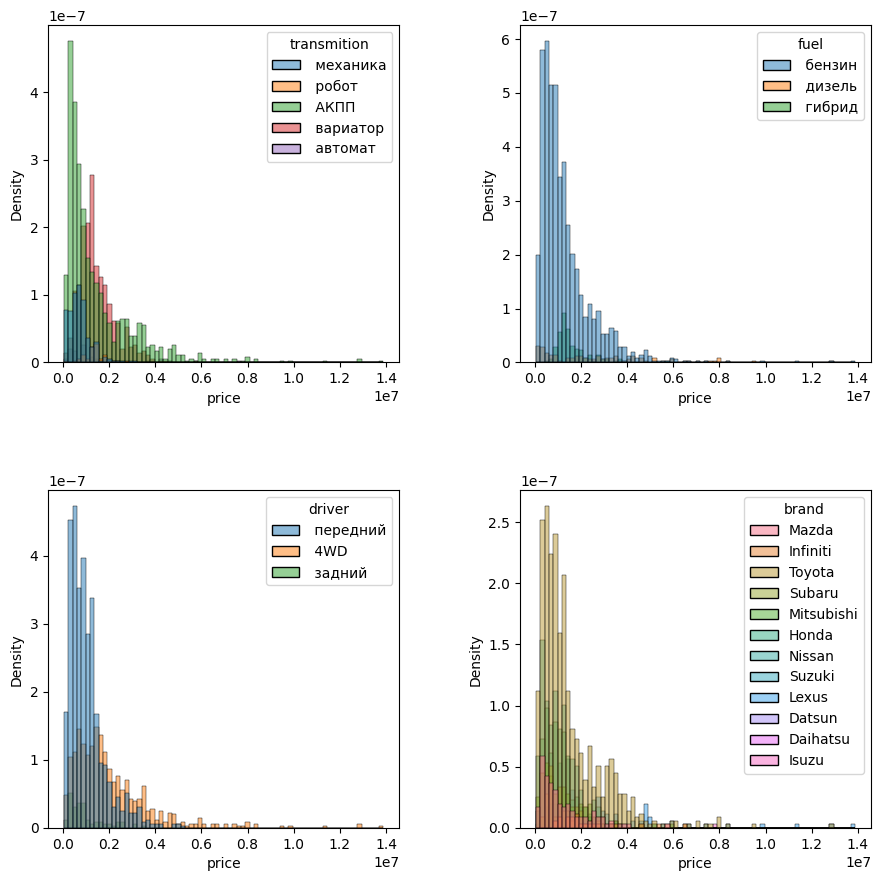

In [170]:
fig,ax = plt.subplots(ncols=2,nrows=2,figsize=(10,10))
sns.histplot(cleaned_df,x='price',hue='transmition',ax=ax[0][0],stat='density')
sns.histplot(cleaned_df,x='price',hue='fuel',ax=ax[0][1],stat='density')
sns.histplot(cleaned_df,x='price',hue='driver',ax=ax[1][0],stat='density')
sns.histplot(cleaned_df,x='price',hue='brand',ax=ax[1][1],stat='density')
fig.tight_layout(pad=5)

Гистограммы показывают, что значение в fuel, driver и transmition могут оказывать влияние на цену автомобиля. В частности, можно предположить, что

1) средняя цена за автомобиль с 4WD приводом будет выше, чем на автомобиль с передним приводом.

2)  средняя цена за автомобиль с вариатором приводом будет выше, чем на автомобиль с АКПП.

In [171]:
import matplotlib as mtl
print(list(mtl.colormaps))

['magma', 'inferno', 'plasma', 'viridis', 'cividis', 'twilight', 'twilight_shifted', 'turbo', 'Blues', 'BrBG', 'BuGn', 'BuPu', 'CMRmap', 'GnBu', 'Greens', 'Greys', 'OrRd', 'Oranges', 'PRGn', 'PiYG', 'PuBu', 'PuBuGn', 'PuOr', 'PuRd', 'Purples', 'RdBu', 'RdGy', 'RdPu', 'RdYlBu', 'RdYlGn', 'Reds', 'Spectral', 'Wistia', 'YlGn', 'YlGnBu', 'YlOrBr', 'YlOrRd', 'afmhot', 'autumn', 'binary', 'bone', 'brg', 'bwr', 'cool', 'coolwarm', 'copper', 'cubehelix', 'flag', 'gist_earth', 'gist_gray', 'gist_heat', 'gist_ncar', 'gist_rainbow', 'gist_stern', 'gist_yarg', 'gnuplot', 'gnuplot2', 'gray', 'hot', 'hsv', 'jet', 'nipy_spectral', 'ocean', 'pink', 'prism', 'rainbow', 'seismic', 'spring', 'summer', 'terrain', 'winter', 'Accent', 'Dark2', 'Paired', 'Pastel1', 'Pastel2', 'Set1', 'Set2', 'Set3', 'tab10', 'tab20', 'tab20b', 'tab20c', 'magma_r', 'inferno_r', 'plasma_r', 'viridis_r', 'cividis_r', 'twilight_r', 'twilight_shifted_r', 'turbo_r', 'Blues_r', 'BrBG_r', 'BuGn_r', 'BuPu_r', 'CMRmap_r', 'GnBu_r', 'G

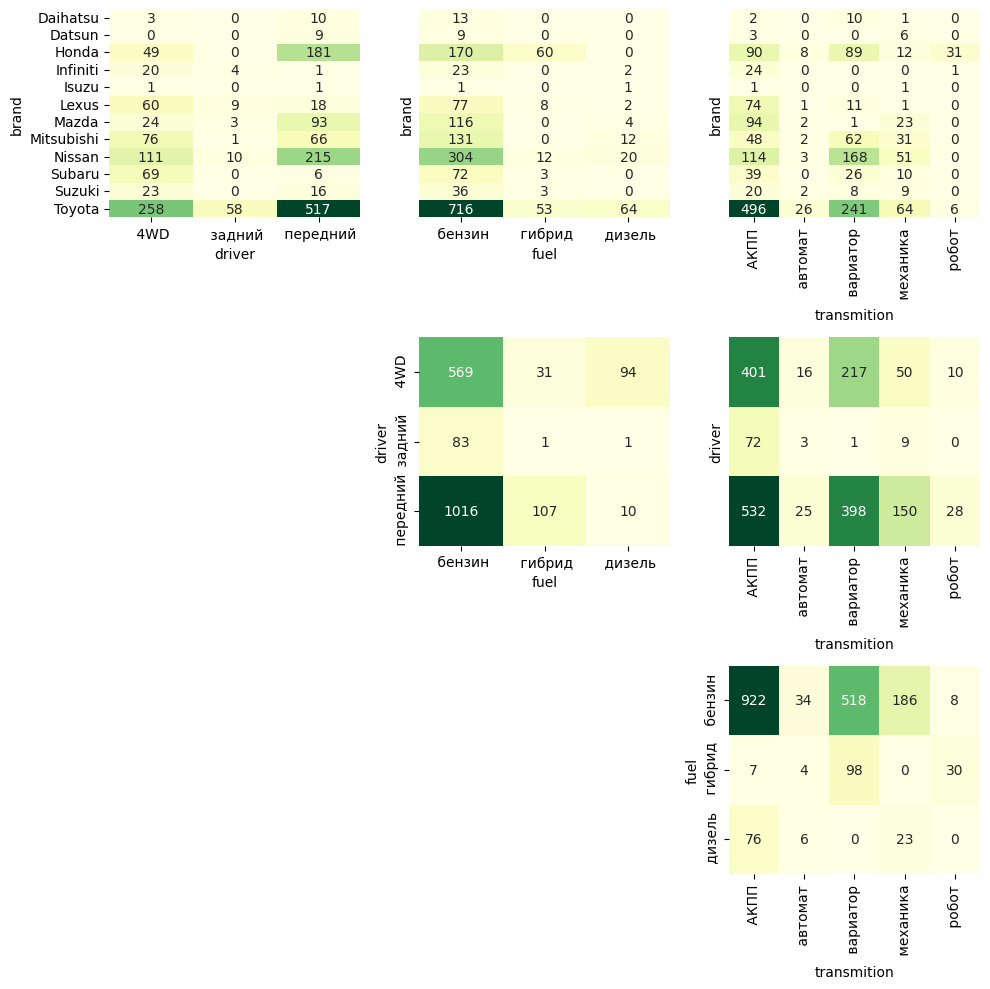

In [172]:
fig, ax = plt.subplots(nrows=3,ncols = 3,figsize=(10,10))
sns.heatmap(pd.crosstab(cleaned_df['brand'],cleaned_df['driver']),cmap='YlGn',annot=True,fmt='',ax=ax[0][0],cbar=False)
sns.heatmap(pd.crosstab(cleaned_df['brand'],cleaned_df['fuel']),cmap='YlGn',annot=True,fmt='',ax=ax[0][1],cbar=False, yticklabels=False)
sns.heatmap(pd.crosstab(cleaned_df['brand'],cleaned_df['transmition']),cmap='YlGn',annot=True,fmt='',ax=ax[0][2], yticklabels=False,cbar=False)

sns.heatmap(pd.crosstab(cleaned_df['driver'],cleaned_df['fuel']),cmap='YlGn',annot=True,fmt='',ax=ax[1][1],cbar=False, yticklabels=True)
sns.heatmap(pd.crosstab(cleaned_df['driver'],cleaned_df['transmition']),cmap='YlGn',annot=True,fmt='',ax=ax[1][2], yticklabels=False,cbar=False)

sns.heatmap(pd.crosstab(cleaned_df['fuel'],cleaned_df['transmition']),cmap='YlGn',annot=True,fmt='',ax=ax[2][2], yticklabels=True,cbar=False)

ax[1][0].axis('off')
ax[2][0].axis('off')
ax[2][1].axis('off')

fig.tight_layout()
plt.show()

## Кодирование категориальных признаков

In [173]:
from sklearn.preprocessing import OneHotEncoder

cat_cols = ['fuel','transmition','driver','brand']
encoder = OneHotEncoder()
encoded_cat = pd.DataFrame(data=encoder.fit_transform(cleaned_df[cat_cols]).toarray(),columns=encoder.get_feature_names_out())

In [174]:
num_cols= ['power','volume','distance','price']
num_df = cleaned_df[num_cols]
encoded_df = pd.concat([encoded_cat,num_df],axis=1)

In [175]:
encoded_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1995 entries, 0 to 1999
Data columns (total 27 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   fuel_ бензин           1912 non-null   float64
 1   fuel_ гибрид           1912 non-null   float64
 2   fuel_ дизель           1912 non-null   float64
 3   transmition_ АКПП      1912 non-null   float64
 4   transmition_ автомат   1912 non-null   float64
 5   transmition_ вариатор  1912 non-null   float64
 6   transmition_ механика  1912 non-null   float64
 7   transmition_ робот     1912 non-null   float64
 8   driver_ 4WD            1912 non-null   float64
 9   driver_ задний         1912 non-null   float64
 10  driver_ передний       1912 non-null   float64
 11  brand_Daihatsu         1912 non-null   float64
 12  brand_Datsun           1912 non-null   float64
 13  brand_Honda            1912 non-null   float64
 14  brand_Infiniti         1912 non-null   float64
 15  brand_Isu

In [176]:
encoded_df = encoded_df.dropna()

In [177]:
encoded_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1829 entries, 0 to 1911
Data columns (total 27 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   fuel_ бензин           1829 non-null   float64
 1   fuel_ гибрид           1829 non-null   float64
 2   fuel_ дизель           1829 non-null   float64
 3   transmition_ АКПП      1829 non-null   float64
 4   transmition_ автомат   1829 non-null   float64
 5   transmition_ вариатор  1829 non-null   float64
 6   transmition_ механика  1829 non-null   float64
 7   transmition_ робот     1829 non-null   float64
 8   driver_ 4WD            1829 non-null   float64
 9   driver_ задний         1829 non-null   float64
 10  driver_ передний       1829 non-null   float64
 11  brand_Daihatsu         1829 non-null   float64
 12  brand_Datsun           1829 non-null   float64
 13  brand_Honda            1829 non-null   float64
 14  brand_Infiniti         1829 non-null   float64
 15  brand_Isu

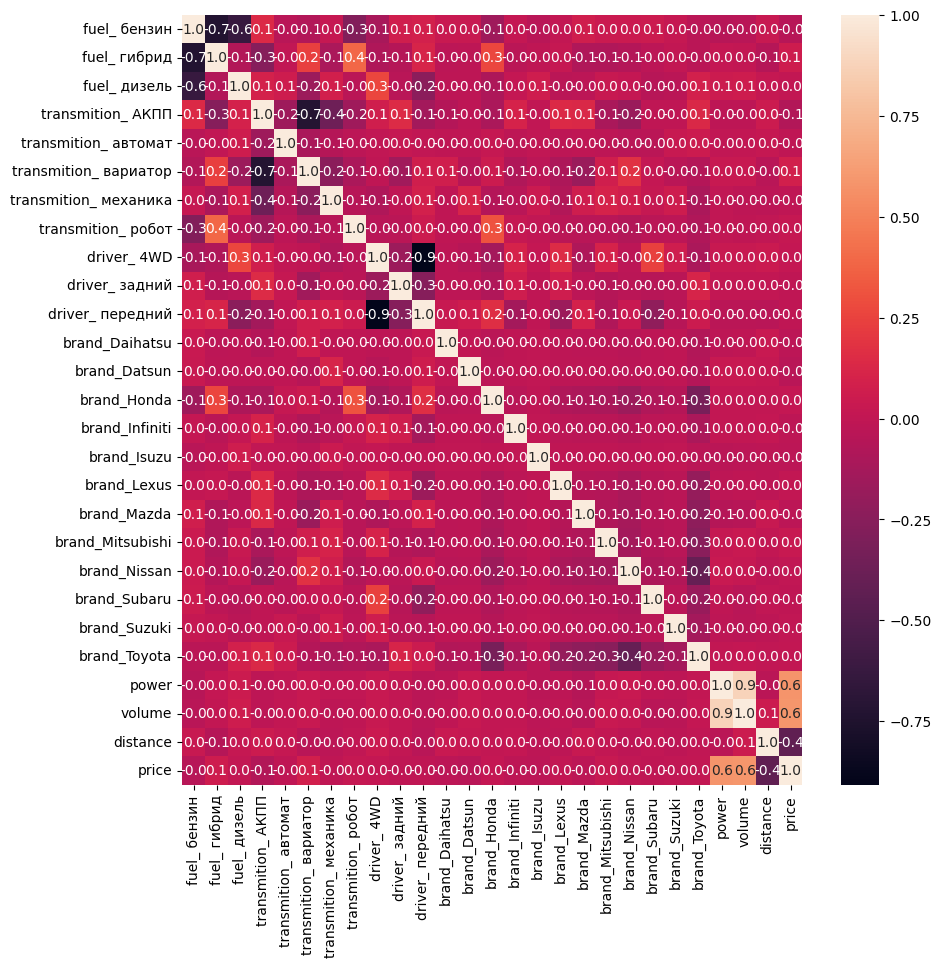

In [178]:
fig,ax = plt.subplots(nrows=1,ncols=1,figsize=(10,10))
sns.heatmap(encoded_df.corr(),ax=ax,annot=True,fmt=".1f")
plt.show()

Корреляционная матрица показывает нескоько интересных наблюдений. \
Во первых, большинство признков абсолютно не взаимосвязанны. \
Во-вторых, несмотря на наличие сильной отрицательной корреляции между парами признаков (fuel_гибрид,fuel_бензин), (transmition_АКПП,transmition_вариатор) и (driver_4WD,driver_передний), её не стот брать во внимание, поскольку признаки в паре не совместны. \
В-третьих, power и volume имеют сильную отрицательную корреляцию между собой. \
В-четвертых, power, volume и distance имеют значимую корреляцию с price.

# Проверка гипотез

## Проверка гипотезы о принадлежности численных колонок к логнормальному распределению

In [179]:
from scipy import stats

In [180]:
distr= stats.lognorm
for column in num_cols:
  print(column,stats.kstest(
      encoded_df[column],
      distr.cdf,
      args=distr.fit(encoded_df[column])
  ))

power KstestResult(statistic=0.0613754445055924, pvalue=1.9705809406565887e-06, statistic_location=150.0, statistic_sign=1)
volume KstestResult(statistic=0.14933281799049725, pvalue=4.537603766572301e-36, statistic_location=2.0, statistic_sign=1)
distance KstestResult(statistic=0.027291680699185195, pvalue=0.12872905651906907, statistic_location=250000.0, statistic_sign=-1)
price KstestResult(statistic=0.024899679929917595, pvalue=0.20341999674197653, statistic_location=1149000.0, statistic_sign=-1)


Гипотезы о том, что колонки power и volume имеют логнормальное,распределение отвергаются.
Гипотезы о гипотезы о том, что колонки distance и price имеют логнормальное,распределение остаются.

## Независимость колонок

In [181]:
for i in range(len(num_cols)):
  for j in range(i+1,len(num_cols)):
    print(num_cols[i],num_cols[j],stats.pearsonr(encoded_df[num_cols[i]],encoded_df[num_cols[j]]))

power volume PearsonRResult(statistic=0.8747500819394392, pvalue=0.0)
power distance PearsonRResult(statistic=-0.03328292986903686, pvalue=0.15478666164304844)
power price PearsonRResult(statistic=0.582051150947652, pvalue=2.4519776008879174e-166)
volume distance PearsonRResult(statistic=0.05252298179319958, pvalue=0.024687665985325062)
volume price PearsonRResult(statistic=0.5846489516561847, pvalue=3.672011456904438e-168)
distance price PearsonRResult(statistic=-0.4308163510621312, pvalue=1.529863520157316e-83)


При уровне значимости 0.95 можно утверждать, что пара (power,distance) имеет нулевую корреляцию, а остальные признаки имеют не нулевую корреляцию между собой.  

## Категориальные гипотезы

### средняя цена за автомобиль с 4WD приводом будет выше, чем на автомобиль с передним приводом?

In [182]:
stats.ttest_ind(
    encoded_df[encoded_df['driver_ 4WD']==1]['price'],
    encoded_df[encoded_df['driver_ передний']==1]['price'],
    equal_var = False,
    alternative='greater'
)

TtestResult(statistic=0.5730650714029116, pvalue=0.283351284262261, df=1263.9546315826492)

Мы не можем отклонить гипотезу, что средняя цена автомобиля с 4WD приводом та же, что и средняя цена автомобиля с передним приводом.

### средняя цена за автомобиль с вариатором приводом будет выше, чем на автомобиль с АКПП.

In [183]:
stats.ttest_ind(
    encoded_df[encoded_df['transmition_ вариатор']==1]['price'],
    encoded_df[encoded_df['transmition_ АКПП']==1]['price'],
    equal_var = False,
    alternative='greater'
)

TtestResult(statistic=3.0766612287068433, pvalue=0.0010764394965344145, df=956.6284771533752)

Мы можем отклонить гипотезу, что средняя цена автомобиля с вариатором равна средней цене автомобиля с АКПП, в пользу гипотезы, то средняя цена автомобиля с вариатором больше средней цены автомобиля с АКПП.

# ML модель

Задача

---
Предсказание цены автомобиля

## Дополнительная подготовка данных

In [184]:
encoded_df.columns

Index(['fuel_ бензин', 'fuel_ гибрид', 'fuel_ дизель', 'transmition_ АКПП',
       'transmition_ автомат', 'transmition_ вариатор',
       'transmition_ механика', 'transmition_ робот', 'driver_ 4WD',
       'driver_ задний', 'driver_ передний', 'brand_Daihatsu', 'brand_Datsun',
       'brand_Honda', 'brand_Infiniti', 'brand_Isuzu', 'brand_Lexus',
       'brand_Mazda', 'brand_Mitsubishi', 'brand_Nissan', 'brand_Subaru',
       'brand_Suzuki', 'brand_Toyota', 'power', 'volume', 'distance', 'price'],
      dtype='object')

В первую очередь нужно разделить наши данные на тренировочную и тестовую части

In [211]:
from sklearn.model_selection import train_test_split
X_train,X_val,y_train,y_val = train_test_split(encoded_df.drop('price',axis=1),encoded_df['price'],random_state=42,test_size=0.2)

Так же нужно нормализовать числовые признаки, чтобы больше влияло относительное значение признака, чем его размерность

In [212]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaled= scaler.fit_transform(X_train[['power', 'volume', 'distance']])
X_train_scaled = X_train
X_train_scaled['power'] = scaled[:,0]
X_train_scaled['volume'] = scaled[:,1]
X_train_scaled['distance'] = scaled[:,2]

scaled_val = scaler.transform(X_val[['power', 'volume', 'distance']])

X_val_scaled = X_val
X_val_scaled['power'] = scaled_val[:,0]
X_val_scaled['volume'] = scaled_val[:,1]
X_val_scaled['distance'] = scaled_val[:,2]


Так же из-за большого размера цен решено логарифмировать их

In [213]:
y_train_log = np.log(y_train)
y_val_log = np.log(y_val)

## Обучение модели

In [214]:
import statsmodels.api as sm
model = sm.OLS(y_train_log,sm.add_constant(X_train_scaled)).fit()

In [215]:
from sklearn import  metrics
print(metrics.mean_squared_error(y_val_log,model.predict(sm.add_constant(X_val_scaled))))

0.33098037445669126


In [218]:
print(metrics.mean_absolute_error(y_val,np.exp(model.predict(sm.add_constant(X_val_scaled)))))

559469.0955237411


## Интерпретация

In [219]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.552
Model:                            OLS   Adj. R-squared:                  0.545
Method:                 Least Squares   F-statistic:                     80.63
Date:                Sat, 01 Jun 2024   Prob (F-statistic):          2.72e-232
Time:                        12:08:02   Log-Likelihood:                -1238.1
No. Observations:                1463   AIC:                             2522.
Df Residuals:                    1440   BIC:                             2644.
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                 -5.014e+

Колонка P>|t| показывает, что вклад в предсказание вносят большей частью power, volume и distance

## Обучение модели с учетом интерпретации

In [223]:
model = sm.OLS(y_train_log,sm.add_constant(X_train_scaled[['power','volume','distance']])).fit()
y_val_pred= model.predict(sm.add_constant(X_val_scaled[['power','volume','distance']]))
print(metrics.mean_squared_error(y_val_log,y_val_pred))
print(metrics.mean_squared_error(y_val,np.exp(y_val_pred)))

0.30563384833745205
723403654691.6211


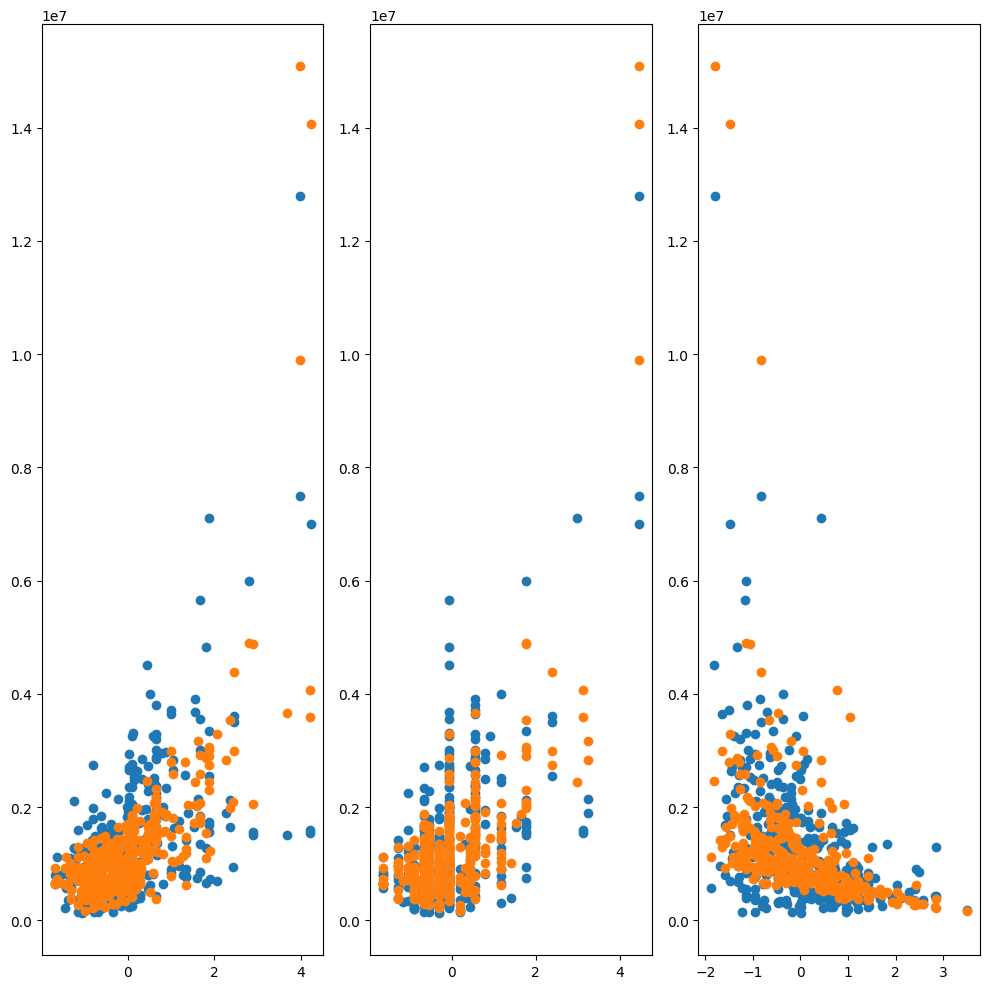

In [225]:
fig, ax = plt.subplots(ncols=3,figsize=(10,10))
ax[0].scatter(X_val_scaled['power'],y_val)
ax[0].scatter(X_val_scaled['power'],np.exp(y_val_pred))

ax[1].scatter(X_val_scaled['volume'],y_val)
ax[1].scatter(X_val_scaled['volume'],np.exp(y_val_pred))

ax[2].scatter(X_val_scaled['distance'],y_val)
ax[2].scatter(X_val_scaled['distance'],np.exp(y_val_pred))

fig.tight_layout()

plt.show()

In [222]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.547
Model:                            OLS   Adj. R-squared:                  0.547
Method:                 Least Squares   F-statistic:                     588.4
Date:                Sat, 01 Jun 2024   Prob (F-statistic):          1.36e-250
Time:                        12:16:20   Log-Likelihood:                -1245.4
No. Observations:                1463   AIC:                             2499.
Df Residuals:                    1459   BIC:                             2520.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         13.8162      0.015    931.034      0.0

Из графиков и интерпретации видно, что беря в расчет эти три признака мы уже имеем модель, отлично описывающую наши данные.

Интересным наблюдением можно считать, что получается, что цена автомобиля в бльшей мере определяется мощьностью, объемом двигателя и пробегом.

Также сущет некоторая предустановленная цена, на которую влияют остальные факторы. Об этом свидетельствует важность и значение параметра const.